# Evaluation

In [7]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd

# Import Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Process the Chicago Crime Data

In [8]:
df = pd.read_csv("C:/Users\zhaoj/OneDrive - The University of Chicago/Desktop/uchicago/Q3/Machine Learning for public policy/ML_2021/data/chicago-crimes-2019.csv")
print("Found {} NaN community area records.".format(df['Community Area'].isna().sum()))
df.dropna(inplace=True)
df['Hour'] = pd.to_datetime(df['Date']).dt.hour

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
C:\Users\zhaoj\AppData\Local\Temp\ipykernel_55112\3042373154.py:1: SyntaxWarning: invalid escape sequence '\z'
  df = pd.read_csv("C:/Users\zhaoj/OneDrive - The University of Chicago/Desktop/uchicago/Q3/Machine Learning for public policy/ML_2021/data/chicago-crimes-2019.csv")


Found 4 NaN community area records.


In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
features = df[['Hour', 'Community Area']]  # Add more columns as needed
target = df['Primary Type']  # Or another column you want to predict

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(features,target)

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.80, 
                                                    random_state=5) # 80% training and 20% test

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

Confusion matrix

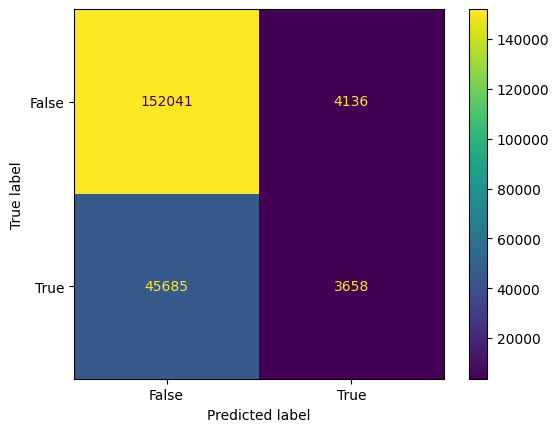

In [11]:
target_class = "THEFT"
y_test_binary = (y_test == target_class)
y_pred_binary = (y_pred == target_class)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot()

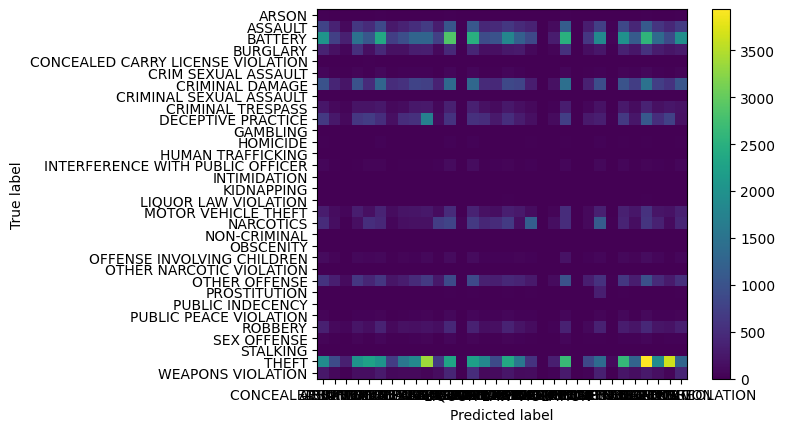

In [12]:
# Import scikit-learn metrics module for accuracy calculation
import numpy as np

all_labels = np.unique(np.concatenate([y_test, y_pred]))
cm = confusion_matrix(y_test, y_pred, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(include_values=False)

Scoring

* Accuracy: $\frac{TP + TN}{P + N}$ (total fraction of correct answers)


* Precision: $\frac{TP}{TP + FP}$ (fraction of positive detections that are correct)


* Recall (Detection Rate): $\frac{TP}{TP+FN}$ (fraction of positive classes correctly detected)


* F1 Score: $2 \cdot \frac{P\cdot R}{P + R}$

In [13]:
from sklearn import metrics

print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(
    metrics.accuracy_score(y_test, y_pred),
    metrics.precision_score(y_test, y_pred, average='weighted'),
    metrics.recall_score(y_test, y_pred, average='weighted'),
    metrics.f1_score(y_test, y_pred, average='weighted')
))

c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy:	0.05266640716231997
Precision:	0.21753020869320863
Recall:		0.05266640716231997
F1 Score:	0.06989147020381409



In [14]:
# 1. 划分训练集和测试集
from sklearn.model_selection import train_test_split

# 假设 features, target 已经定义
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0, stratify=target)

# 2. 训练模型
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, class_weight='balanced')
rf.fit(X_train, y_train)

# 3. 预测
y_pred = rf.predict(X_test)

In [15]:
y_test_binary = (y_test == 'ARREST')  # 或 y_test == 1, 取决于你的数据
y_pred_binary = (y_pred == 'ARREST')

print(metrics.classification_report(
    y_test_binary, y_pred_binary,
    labels=[False, True],
    target_names=['No Arrest', 'Arrest']
))

              precision    recall  f1-score   support

   No Arrest       1.00      1.00      1.00     51380
      Arrest       0.00      0.00      0.00         0

    accuracy                           1.00     51380
   macro avg       0.50      0.50      0.50     51380
weighted avg       1.00      1.00      1.00     51380



c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

ROC curve

模型在不同分类阈值下的真正率（True Positive Rate, TPR）和假正率（False Positive Rate, FPR）之间的权衡

模型对每个样本输出一个概率分数（而不是直接输出类别）。
选取不同的阈值（如0.0, 0.1, ..., 1.0），将概率大于阈值的样本判为正类，否则为负类。
对每个阈值，计算对应的 TPR 和 FPR。
以 FPR 为横轴，TPR 为纵轴，画出曲线。
AUC 越接近 1，模型区分能力越强。
AUC=0.5 表示模型没有区分能力（等同于随机猜测）。

$$
FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$

​
$$
TPR = \frac{\text{True Positives}}{\text{False Positives} + \text{True Negatives}}
$$

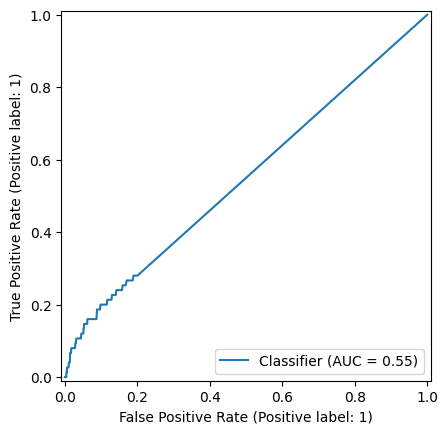

In [16]:
from sklearn.metrics import RocCurveDisplay
y_test_binary = (y_test == 'ARSON')
y_score = rf.predict_proba(X_test)[:, list(rf.classes_).index('ARSON')]

RocCurveDisplay.from_predictions(y_test_binary, y_score)
plt.show()

c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


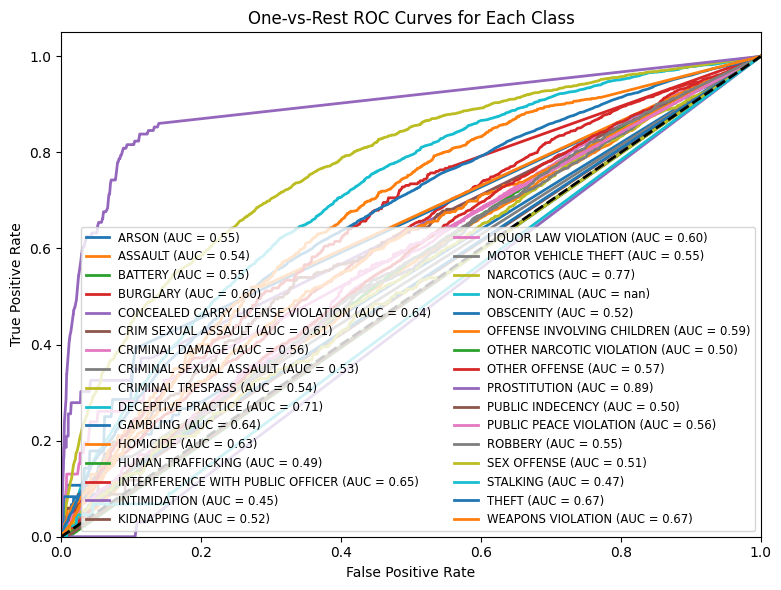

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 假设 y_test 是真实标签，rf 是已训练好的模型，X_test 是测试集特征
# 1. 获取所有类别
classes = rf.classes_

# 2. 将 y_test 二值化（one-hot编码）
y_test_bin = label_binarize(y_test, classes=classes)

# 3. 获取每个类别的预测概率
y_score = rf.predict_proba(X_test)

# 4. 画每个类别的 ROC 曲线
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curves for Each Class')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

Precision-recall curve

Precision（精确率）：预测为正样本中，真正为正的比例。

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

​
Recall（召回率）：所有正样本中，被正确预测为正的比例。

$$
\text{Recall} = \frac{TP}{TP + FN}
$$
 
其中，TP=True Positive（真正例），FP=False Positive（假正例），FN=False Negative（假负例）。

对于一个二分类模型（如逻辑回归、SVM等），通常会输出一个概率分数。
通过改变判定为“正类”的概率阈值（threshold），可以得到不同的Precision和Recall值。
以Recall为横轴，Precision为纵轴，绘制出曲线。

理想模型：PR曲线接近左上角（高precision和高recall）。

随机模型：PR曲线接近一条水平线（precision等于正样本比例）。

In [18]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn import metrics
print(hasattr(metrics, "plot_precision_recall_curve"))

False


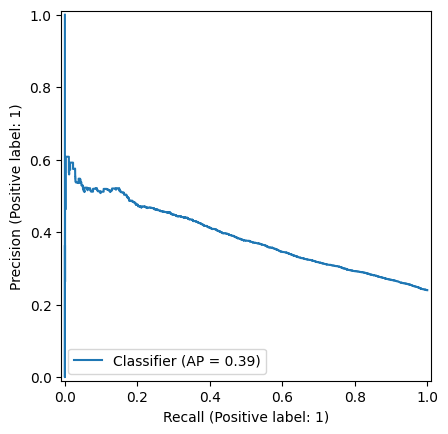

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

target_class = "THEFT"  
y_test_binary = (y_test == target_class)
# predict_proba 返回的是每个类别的概率，找到对应类别的概率列
class_index = list(rf.classes_).index(target_class)
y_score = rf.predict_proba(X_test)[:, class_index]

PrecisionRecallDisplay.from_predictions(y_test_binary, y_score)
plt.show()

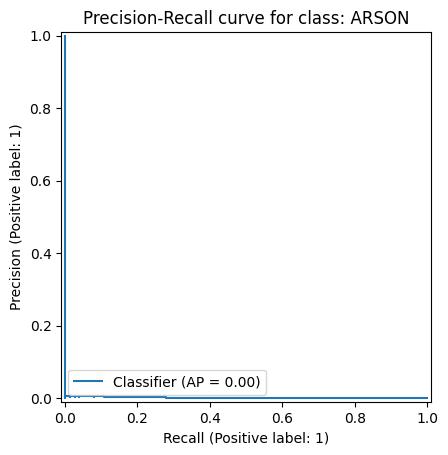

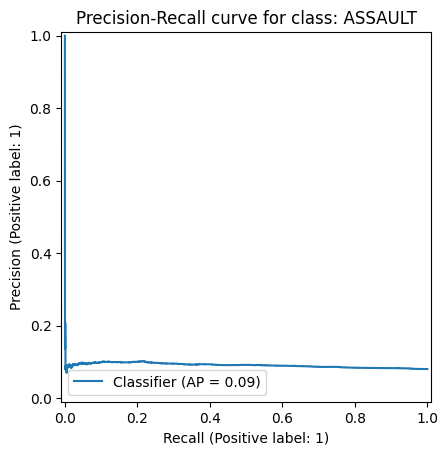

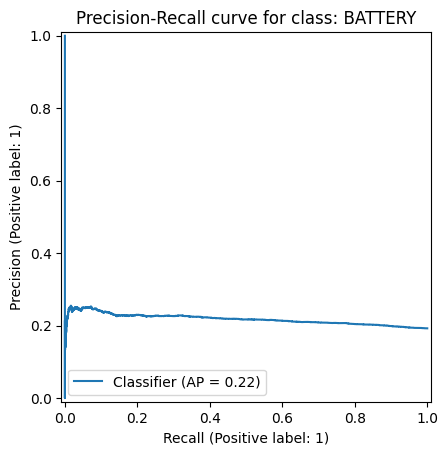

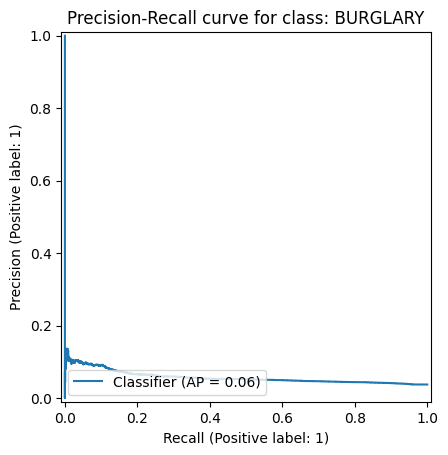

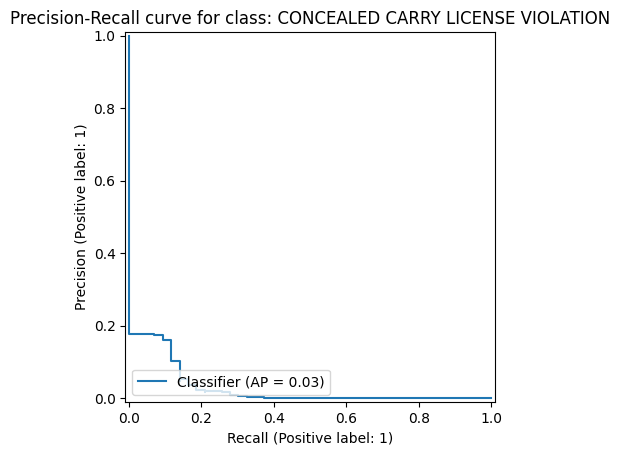

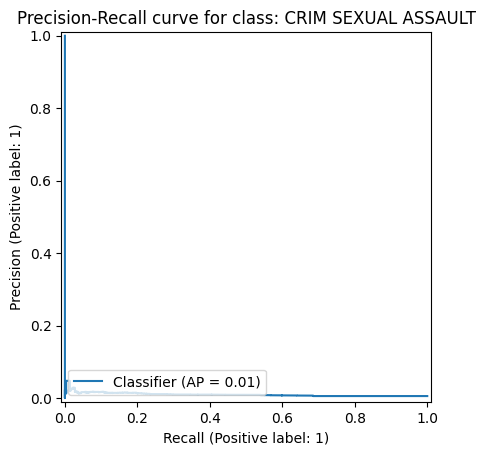

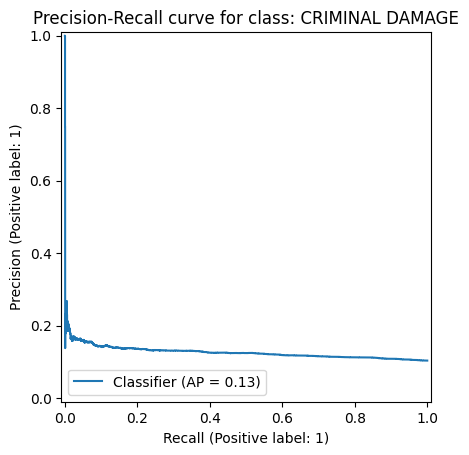

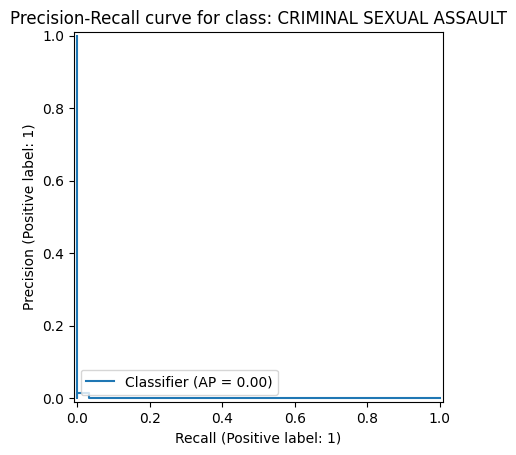

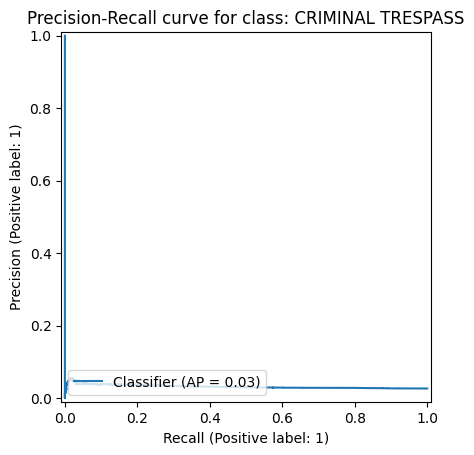

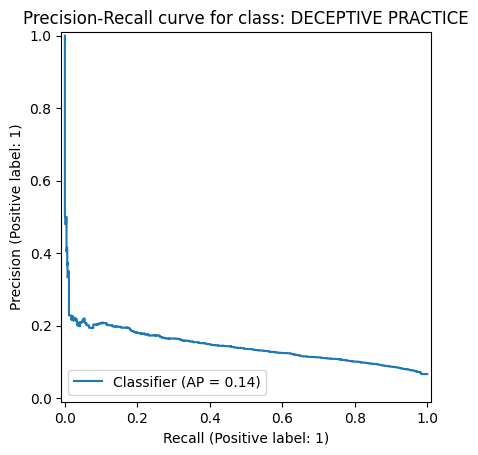

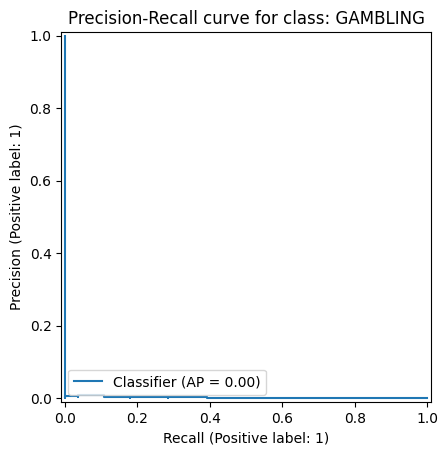

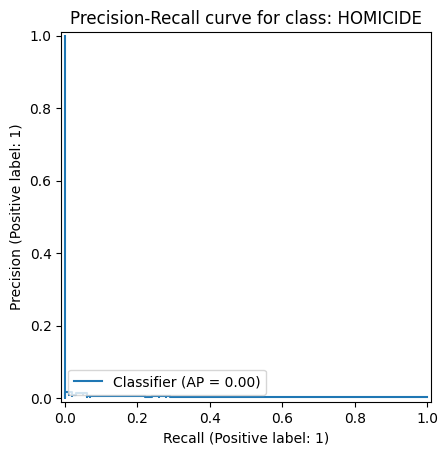

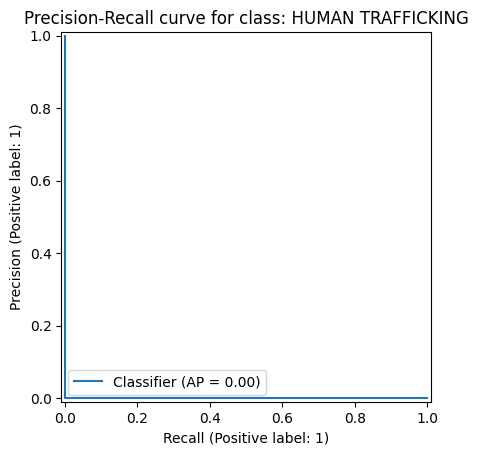

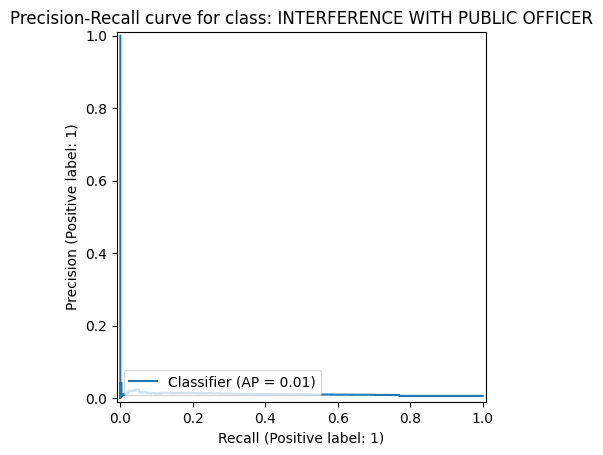

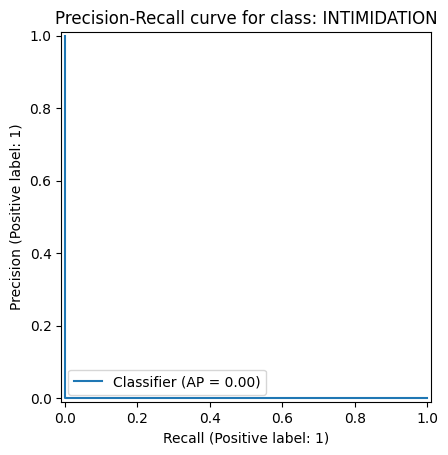

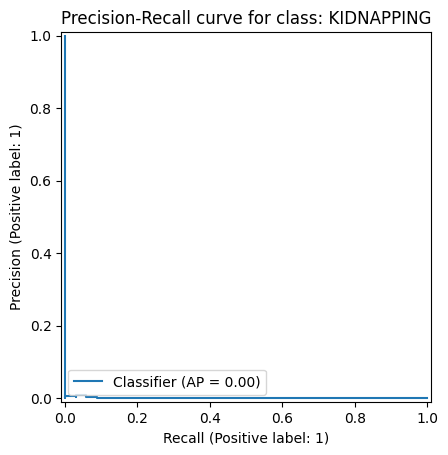

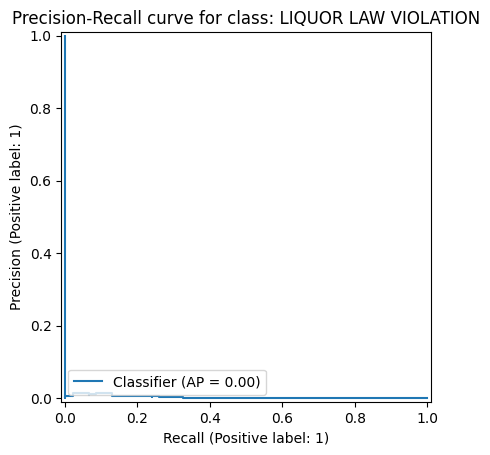

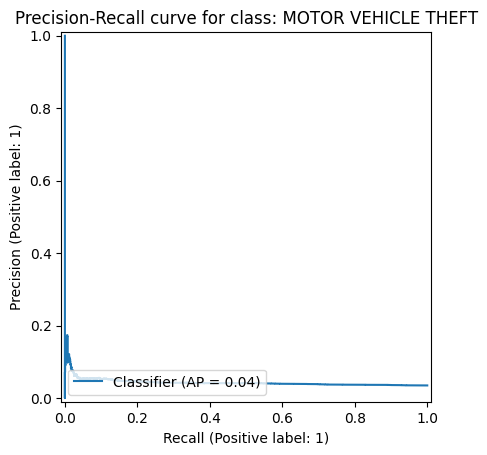

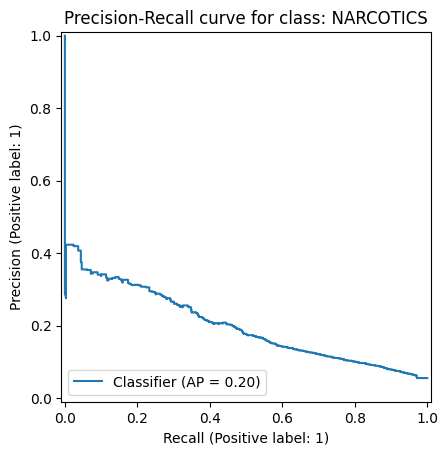

c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\zhaoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


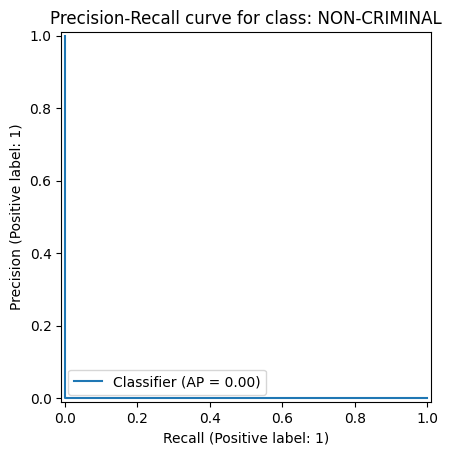

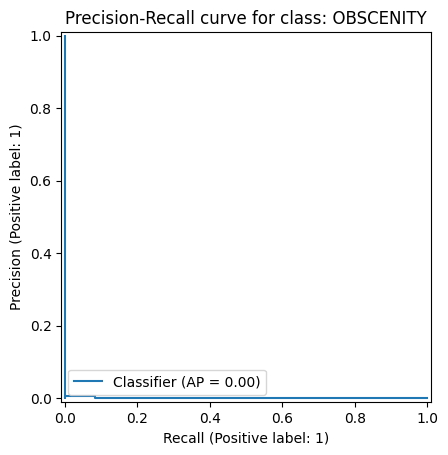

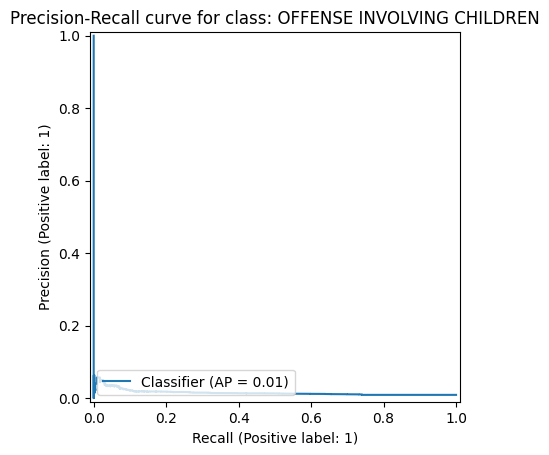

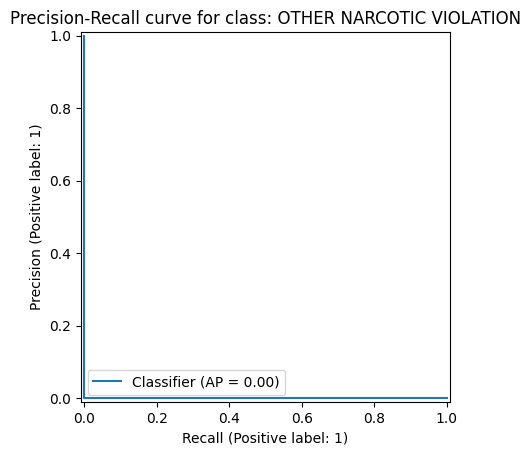

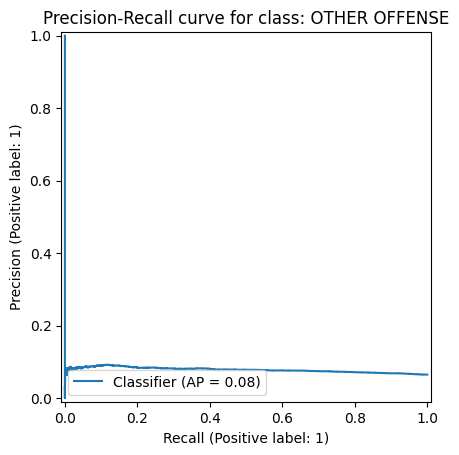

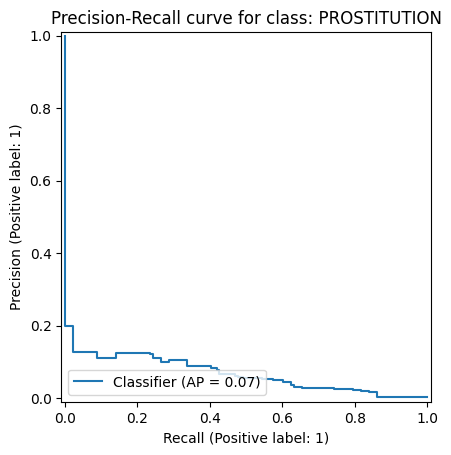

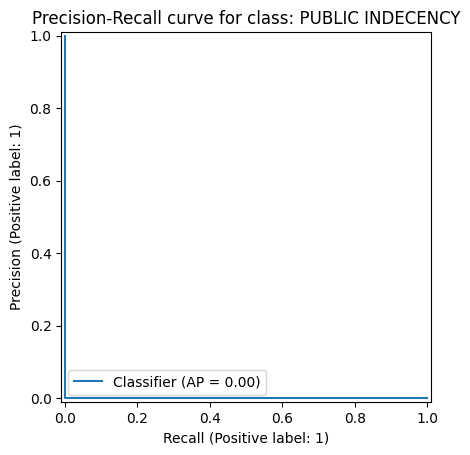

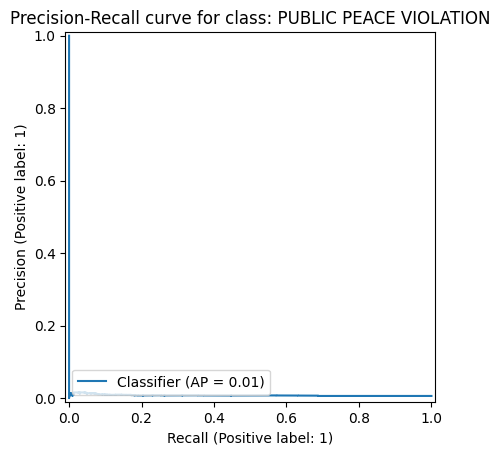

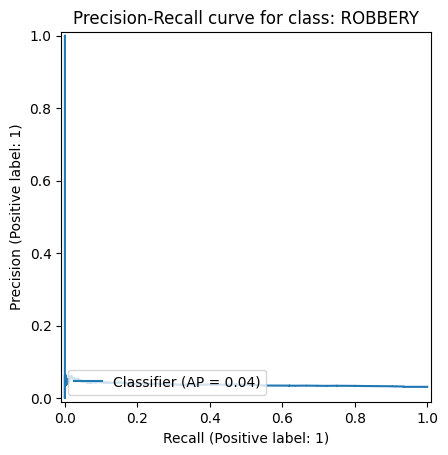

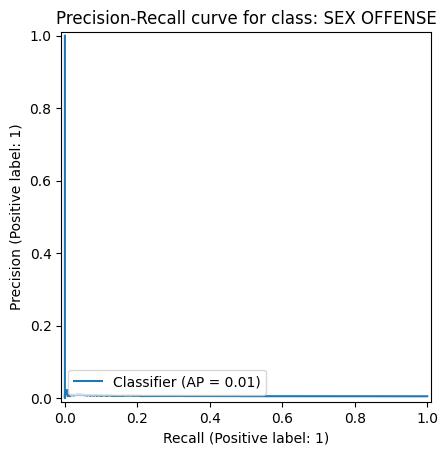

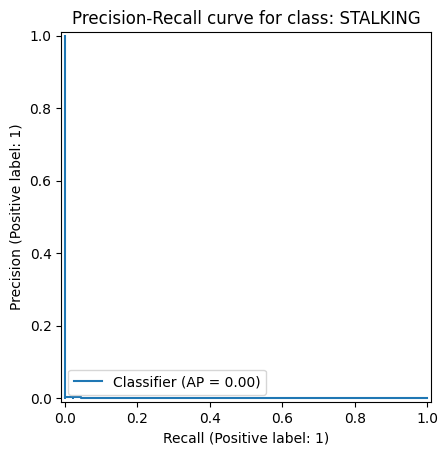

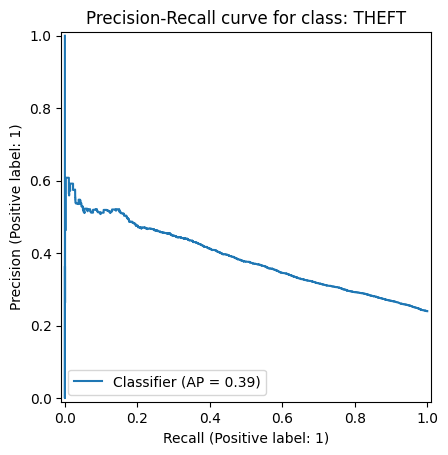

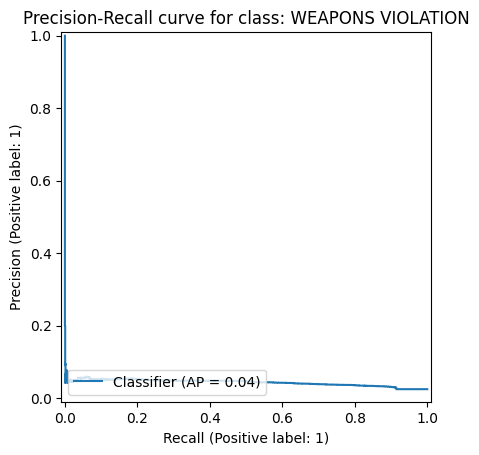

In [23]:
for class_name in rf.classes_:
    y_test_binary = (y_test == class_name)
    class_index = list(rf.classes_).index(class_name)
    y_score = rf.predict_proba(X_test)[:, class_index]
    PrecisionRecallDisplay.from_predictions(y_test_binary, y_score)
    plt.title(f"Precision-Recall curve for class: {class_name}")
    plt.show()

## Evaluation Function

In [24]:
def runEval(clf,X_test,y_test,y_pred,target_names=None):
    plot_confusion_matrix(clf,X_test,y_test)
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(metrics.accuracy_score(y_test, y_pred),
                                                                           metrics.precision_score(y_test, y_pred),
                                                                           metrics.recall_score(y_test, y_pred),
                                                                           metrics.f1_score(y_test, y_pred)
                                                                          ))
    plot_roc_curve(clf,X_test,y_test)
    plot_precision_recall_curve(clf,X_test,y_test)

## Evaluating Other Models

### Logistic Regression

In [26]:
# Convert Arrest to int type
df['Arrest'] = df['Arrest'].astype(int)

# Number of Arrests per hour
arrest_hour = pd.DataFrame(df.groupby(['Hour'])['Arrest'] \
                                              .sum() \
                                              .reset_index(name='arrests') \
                                              .sort_values(['Hour'], ascending=True))

# Number of Incidents per hour
all_hour = pd.DataFrame(df.groupby(['Hour'])['ID'] \
                                              .count() \
                                              .reset_index(name='incidents') \
                                              .sort_values(['Hour'], ascending=True))

# New Dataframe
adf = pd.merge(arrest_hour,all_hour,on=['Hour'])
adf['prob'] = adf['arrests'] / adf['incidents']

# This is a derived binary variable that is "toy" for the sake of illustration.
adf['pthresh'] = adf['prob'] > 0.18
adf['hrs'] = (adf['Hour'] + 21) % 24

adf.head(5)

,Hour,arrests,incidents,prob,pthresh,hrs
0,0,2263,12335,0.183462,True,21
1,1,1768,7904,0.223684,True,22
2,2,1339,6891,0.194311,True,23
3,3,974,5457,0.178486,False,0
4,4,659,4391,0.150080,False,1


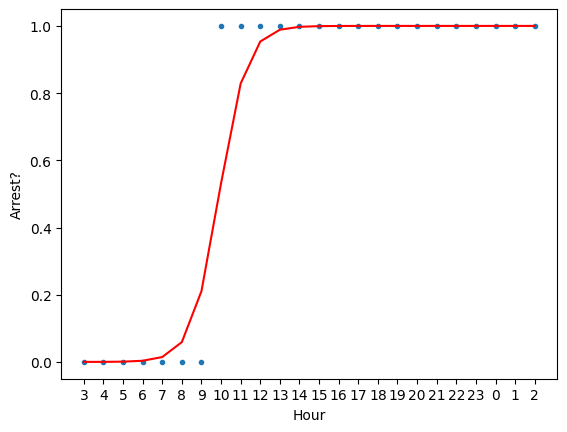

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline  

# Features for fitting the model.
x = adf['hrs'].astype('float').values.reshape(-1,1)
y = adf['pthresh']
z = np.arange(0.,24.,1).reshape(-1, 1);

penalty='l2'
C = 20
solver='lbfgs'

pipelineCV = Pipeline([
    ('norm', StandardScaler()),
    ('logr', LogisticRegressionCV(penalty=penalty,
                                  class_weight='balanced',
                                  Cs=C,
                                  cv=2,
                                  random_state=0,
                                  solver=solver)),
])

pipelineCV.fit(x, y)
lineCV = pipelineCV.predict_proba(z)[:,1]

hours = pd.concat([adf['Hour'][3:], adf['Hour'][0:3]])
plt.xticks(np.arange(24), hours)
plt.xlabel('Hour')
plt.ylabel('Arrest?')
plt.plot(x, y, '.')
plt.plot(z, lineCV, color='red')
plt.show()

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Split dataset into training set and test set
def runEval(clf, X_test, y_test, y_pred, target_names=None):
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=target_names)
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(
        metrics.accuracy_score(y_test, y_pred),
        metrics.precision_score(y_test, y_pred),
        metrics.recall_score(y_test, y_pred),
        metrics.f1_score(y_test, y_pred)
    ))

Support Vector Machines

In [43]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline

features = df.loc[:,['Primary Type', 'Domestic', 'Community Area','Location Description','Hour']]
features2d = df.loc[:,['Community Area', 'Hour']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features2d, 
                                                    target, 
                                                    test_size=0.80, 
                                                    random_state=5) # 80% training and 20% test

In [44]:
svc = Pipeline([
    ('ohe', OneHotEncoder()),
    ('svc', SVC(kernel='linear', random_state=0, gamma=0.5, C=1.0, class_weight='balanced')),
])

In [ ]:
# Train the model using the training sets y_pred=clf.predict(X_test)
svc.fit(X_train,y_train)

# prediction on test set
y_pred = svc.predict(X_test)

In [ ]:
runEval(svc,X_test,y_test,y_pred,['No Arrest','Arrest'])